<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/KMeans_Custormers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import pandas as pd

In [177]:
customers_dataset = pd.read_csv('/content/Mall_Customers.csv')
customers_dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [178]:
customers_dataset.drop(columns='CustomerID', inplace = True)
customers_dataset.shape

(200, 4)

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

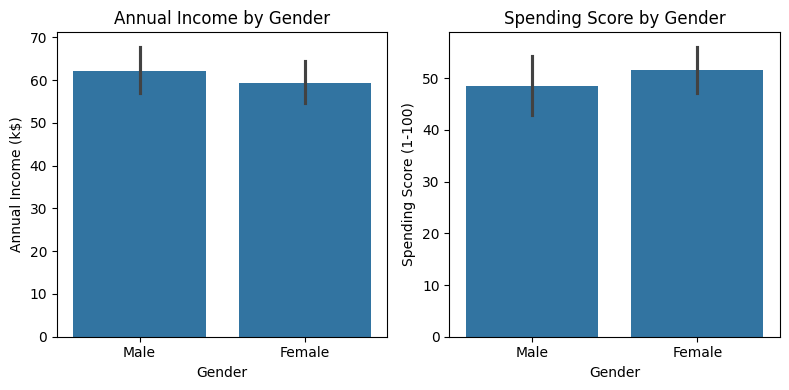

In [180]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.barplot(data = customers_dataset, x = 'Gender', y = 'Annual Income (k$)', ax=axes[0])
axes[0].set_title('Annual Income by Gender')

sns.barplot(data = customers_dataset, x = 'Gender', y = 'Spending Score (1-100)', ax=axes[1])
axes[1].set_title('Spending Score by Gender')

plt.tight_layout()
plt.show()

In [181]:
x = customers_dataset.drop(columns='Gender')
y = customers_dataset.iloc[:, :1]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(170, 3)
(30, 3)
(170, 1)
(30, 1)


In [184]:
y_test.value_counts()

,count
Gender,
Female,17
Male,13


In [185]:
from sklearn.cluster import KMeans

In [186]:
import numpy as np

In [187]:
# Generate a random number
# random_num = np.random.randint(2,12)
# print(random_num)
kms = KMeans(n_clusters=2)

In [188]:
kms.fit(x_train, y_train)
y_pred = kms.predict(x_test)
y_pred.shape

(30,)

In [189]:
from sklearn.metrics import silhouette_score

In [190]:
silhouette_avg = silhouette_score(x_test, y_pred)
print(f"The average silhouette score is: {silhouette_avg}")

The average silhouette score is: 0.28700310290550957


The silhouette score is a metric used to evaluate the quality of clusters created by clustering algorithms like K-Means. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

The score ranges from -1 to 1:
-   **1:** Indicates that the clusters are well-separated and distinct.
-   **0:** Suggests that the clusters are indifferent, or that the samples are very close to the decision boundary between two neighboring clusters.
-   **-1:** Means that the samples have been assigned to the wrong clusters.

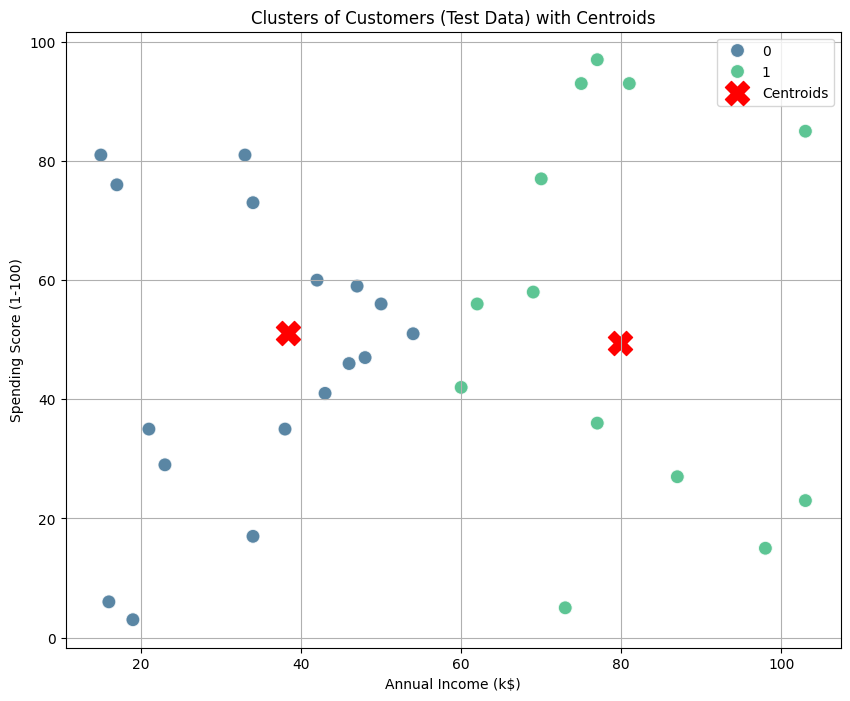

In [191]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=x_test['Annual Income (k$)'], y=x_test['Spending Score (1-100)'], hue=y_pred, palette='viridis', s=100, alpha=0.8)

centroids = kms.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters of Customers (Test Data) with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaler = MinMaxScaler()

In [194]:
xn = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [195]:
xn_train, xn_test, yn_train, yn_test = train_test_split(xn, y, test_size=0.15, stratify=y, random_state=3)

In [196]:
kms.fit(xn_train, yn_train)
yn_pred = kms.predict(xn_test)
# y_pred.shape

In [197]:
silhouetten_avg = silhouette_score(xn_test, yn_pred)
print(f"The average silhouette score is: {silhouetten_avg}")

The average silhouette score is: 0.31409339368140454


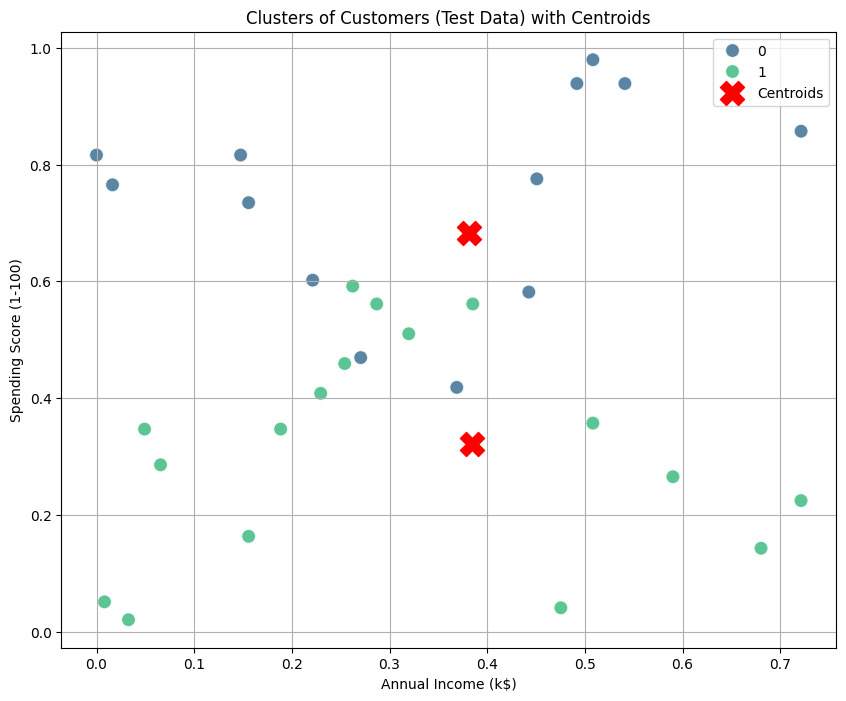

In [198]:
plt.figure(figsize=(10, 8))

sns.scatterplot(x=xn_test['Annual Income (k$)'], y=xn_test['Spending Score (1-100)'], hue=yn_pred, palette='viridis', s=100, alpha=0.8)

centroids = kms.cluster_centers_
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

plt.title('Clusters of Customers (Test Data) with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

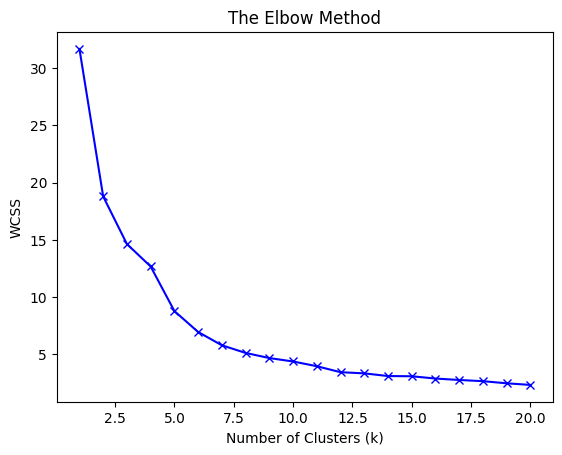

In [201]:
wcss = []
K = range(1, 21)
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(xn_train, yn_train)
  wcss.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()